# Preprocessing Eye-Tracking Data

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

## Dataframe setup

In [2]:
# paths and files
data_dir = Path('.').resolve().parent / "data"
# files = data_dir.glob('**/*.csv')  # all files for all subjects
files = (data_dir / "sub-01").glob('*.csv')  # for single subject 
data_files = sorted(list(files))

# load into one dataframe
df = pd.concat(map(lambda f: pd.read_csv(f, index_col=None, header=0), data_files), ignore_index=True)

In [3]:
df.columns

Index(['TrialNumber', 'quadrant', 'speed', 'speed_px', 'motion_cycle', 'ran',
       'order', 'n_cue', 'saccade_delay', 'sub', 'ses', 'run', 'target',
       'trial_type', 'saccade_dur', 'target_pos_x', 'target_pos_y',
       'saccade_spos_x', 'saccade_spos_y', 'saccade_epos_x', 'saccade_epos_y',
       'target_pos_x_deg', 'target_pos_y_deg', 'saccade_spos_x_deg',
       'saccade_spos_y_deg', 'saccade_epos_x_deg', 'saccade_epos_y_deg'],
      dtype='object')

## Plotting

In [4]:
targets = []
for idx, row in df.iterrows():
    target = (row["target_pos_x"], row["target_pos_y"])
    if not target in targets:
        targets.append(target)

In [5]:
targets

[(-165.27, 275.45), (-275.45, 165.27), (165.27, 165.27), (275.45, 275.45)]

In [7]:
ncdf = df[df["trial_type"]=="test"]
ncdf = ncdf[(ncdf["saccade_epos_y_deg"]<10) & (ncdf["saccade_epos_x_deg"]<10)]
ncdf = ncdf.iloc[:50, :]

Text(0.5, 1.0, 'Saccade landing positions')

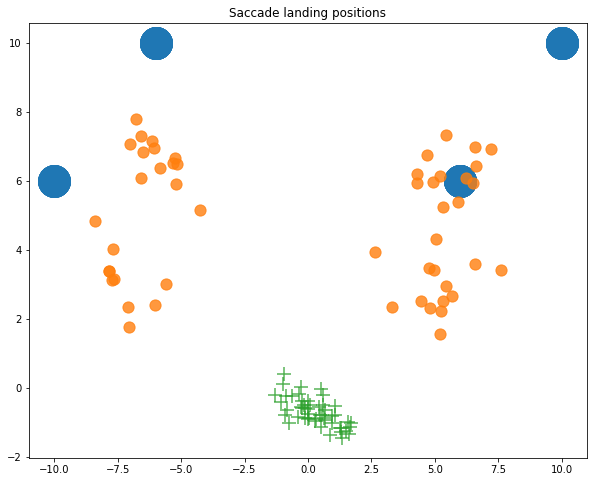

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))

# ax.scatter(targets[0][0], targets[0][1], marker='o', cmap='jet', alpha=.8, s=500, edgecolors='none', data=df)
ax.scatter("target_pos_x_deg", "target_pos_y_deg", marker='o', cmap='jet', alpha=.8, s=1000, data=ncdf)
ax.scatter("saccade_epos_x_deg", "saccade_epos_y_deg", marker='.', alpha=.8, s=500, data=ncdf)
ax.scatter("saccade_spos_x_deg", "saccade_spos_y_deg", marker='+', alpha=.8, s=200, data=ncdf)
ax.set_title("Saccade landing positions")
# ax.invert_yaxis()